In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Loading dataset
data = pd.read_csv('datasets/bike_sharing.csv')

In [3]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
data.shape

(17379, 17)

In [6]:
#As mentioned above instant is record index
#Checking values of instant
data.instant.unique()

array([    1,     2,     3, ..., 17377, 17378, 17379], dtype=int64)

In [7]:
#As instant is the index value we can drop that column

data.drop(columns=["instant"],inplace=True)

In [8]:
data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Date is in object type

In [9]:
#Changing dteday from object to datetime
data['dteday'] = pd.to_datetime(data['dteday']) 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 2.1 MB


In [11]:
#checking for null values
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
#Checkign for count of unique values
data.nunique()

dteday        731
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

In [13]:
data.cnt.max()

977

In [14]:
#Checking for value of season
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

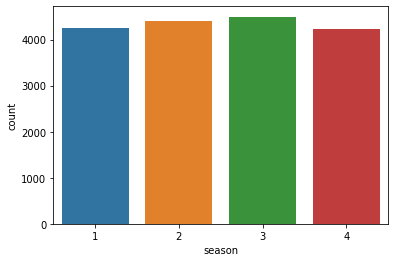

In [15]:
sns.countplot(x="season",data=data)
plt.show()

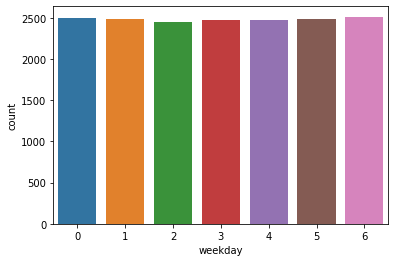

In [16]:
sns.countplot(x="weekday",data=data)
plt.show()

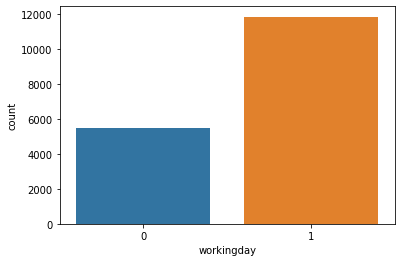

In [17]:
sns.countplot(x="workingday",data=data)
plt.show()

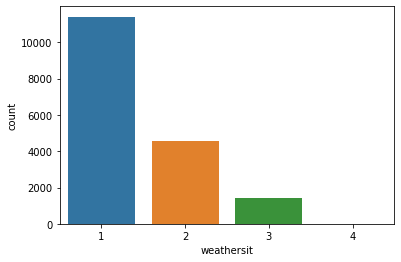

In [18]:
sns.countplot(x="weathersit",data=data)
plt.show()

In [19]:
data.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

#### Visualizing data with respect to count

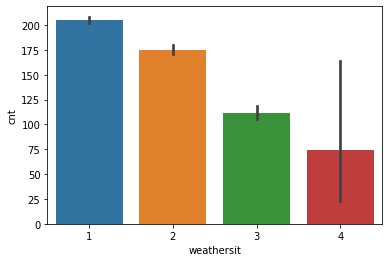

In [20]:
sns.barplot(x='weathersit',y='cnt',data=data)
plt.show()

For weathersit 1 count was high

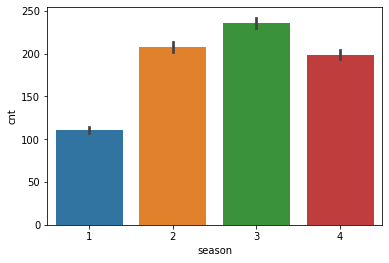

In [21]:
#Checking with season
sns.barplot(x='season',y='cnt',data=data)
plt.show()

Bike sharing was high at 3:summer.

And lowest for season winter

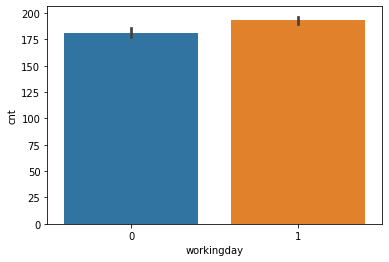

In [22]:
#Checking with workingday
sns.barplot(x='workingday',y='cnt',data=data)
plt.show()

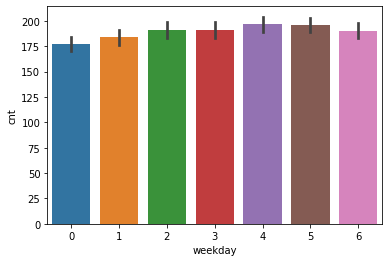

In [23]:
#Checking with weekday
sns.barplot(x='weekday',y='cnt',data=data)
plt.show()

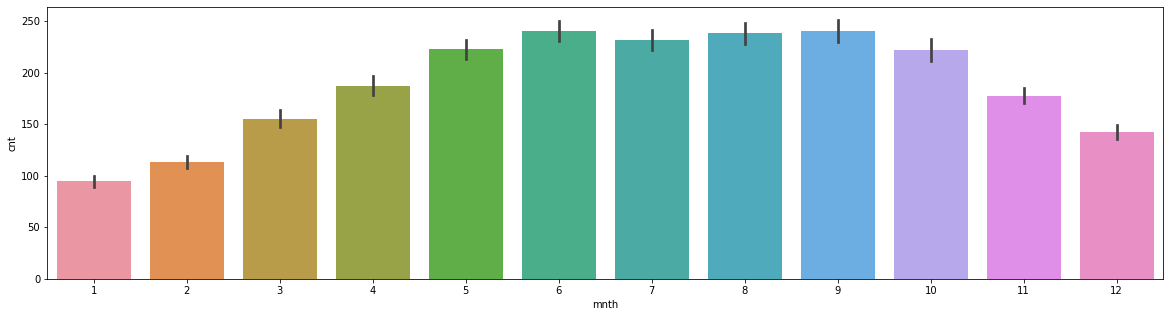

In [24]:
#Checking with mnth
plt.figure(figsize=(20,5))
sns.barplot(x='mnth',y='cnt',data=data)
plt.show()

Sharing was high for month May, June, July, Aug, Sept 

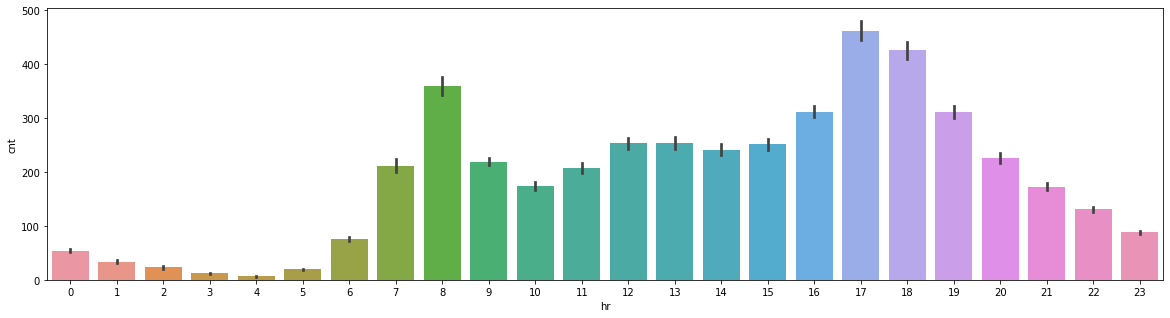

In [25]:
#Checking with hr
plt.figure(figsize=(20,5))
sns.barplot(x='hr',y='cnt',data=data)
plt.show()

Sharing was high between 16 to 19 hr

In [26]:
#Finding corr

data.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


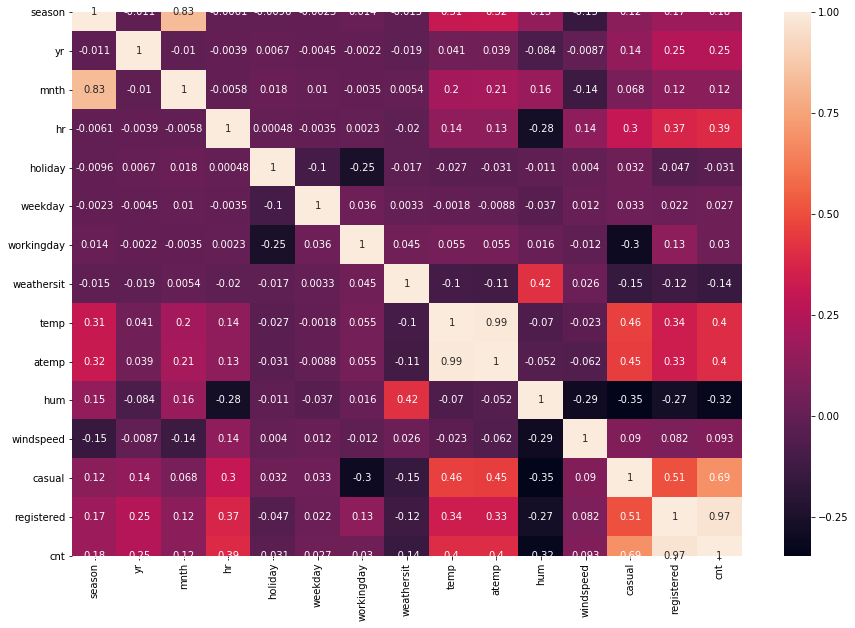

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

From the above observation we can say that 'cnt' is highly positive correlated, corresponding to registered and casual, and as per data information, casual and registered is also depends upon the other factors. We can drop date, registered and casual from our observation.

In [28]:
#droping casual, registered and datetime
data.drop(columns=["dteday","registered","casual"],inplace=True)

In [29]:
#Describing dataset

data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<Figure size 1800x360 with 0 Axes>

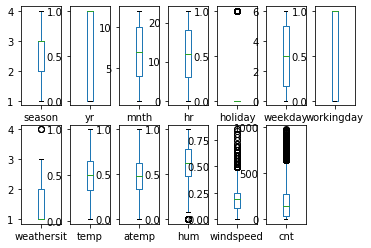

In [30]:
#Checking outliers
#displaying box plot for outliers
plt.figure(figsize=(25,5))
data.plot(kind='box',subplots=True,layout=(2,7))
plt.show()

Outliers are present in hr, weathersit, hum.

In [31]:
#Removing outliers from dataset
print("Data size before removing outliers",data.shape)
print()
#Removing outliers
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]
print("Data size after removing outliers",data.shape)
print()

Data size before removing outliers (17379, 13)

Data size after removing outliers (16506, 13)



##### SPLITTING THE DATA

In [32]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [33]:
x = data.iloc[:,0:-1]
y = data.cnt

In [34]:
#Checking skewness of data in x

x.skew()

season       -0.005188
yr            0.019632
mnth          0.000436
hr            0.013967
holiday       0.000000
weekday      -0.036488
workingday   -0.868486
weathersit    1.215060
temp         -0.003289
atemp        -0.085390
hum          -0.092995
windspeed     0.387415
dtype: float64

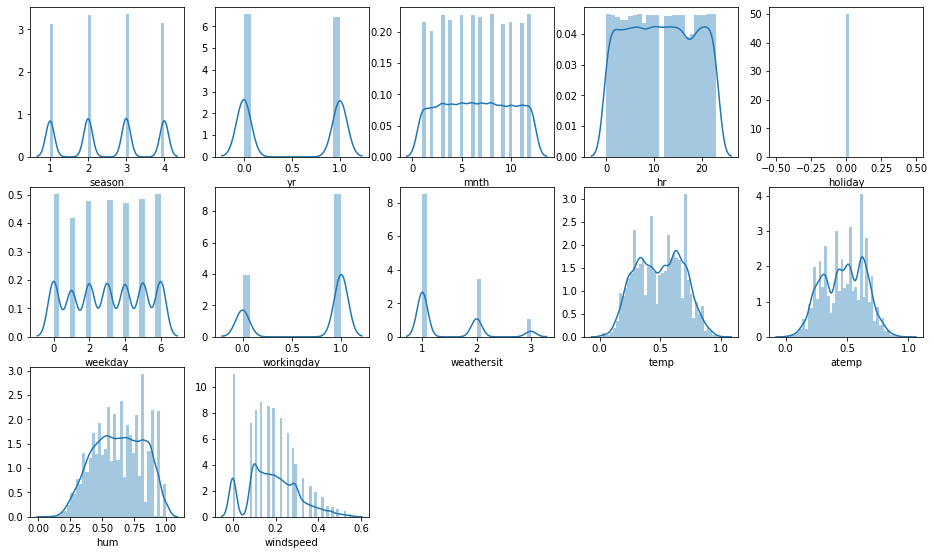

In [35]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

Data is almost normal.

In [36]:
#Scaling data
#Using standard scaler 
ss=SS()
ss.fit(x)
x=ss.transform(x)

### TRAIN AND TEST SPLIT

In [37]:
def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    

#### LINEAR REGRESSION

In [38]:
lr = LR()
best_model(lr)

Max R2 Score Corresponding to random state  51  is  42.0


#### DTR

In [39]:
dtr = DTR()
best_model(dtr)

Max R2 Score Corresponding to random state  50  is  90.0


#### KNR

In [40]:
neighbors = {"n_neighbors":range(1,30)}
knr = KNR()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 14}

In [41]:
knr = KNR(n_neighbors=14)
best_model(knr)

Max R2 Score Corresponding to random state  44  is  62.0


In [42]:
rfr = RFR(n_estimators=50) 

param_grid = { 
    'n_estimators': [50, 100, 200]
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x, y)
CV_rfr.best_params_

{'n_estimators': 200}

In [43]:
rfr=RFR(n_estimators=100)
best_model(rfr)

Max R2 Score Corresponding to random state  49  is  95.0


### TESTING USING CROSS VAL SCORE

In [44]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=15,scoring="r2")

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))

#### LINEAR REGRESSION

In [45]:
lr = LR()
cross_val_function(lr)

Cross Val Score:  [-0.93115117 -0.02570974  0.34309447  0.3758561   0.22339795  0.36451961
  0.29199952  0.15843311  0.20061765  0.26068859  0.31858784  0.25273957
  0.34152879  0.33388736  0.2344911 ]
Mean Scores:  0.18286538244548017
Standard deviation:  0.3135735001110025
Score : 18.0


#### DTR

In [46]:
dtr = DTR()
cross_val_function(dtr)

Cross Val Score:  [0.47578329 0.65079743 0.76912994 0.8769302  0.84749027 0.81315067
 0.78977941 0.64916429 0.71661713 0.8340379  0.87421597 0.88528097
 0.87470215 0.85246595 0.61963922]
Mean Scores:  0.7686123193363821
Standard deviation:  0.11733447141751643
Score : 77.0


#### KNR

In [47]:
knr = KNR(n_neighbors=14)
cross_val_function(knr)

Cross Val Score:  [0.06075473 0.38352556 0.46223276 0.57341348 0.48358287 0.46858467
 0.4493401  0.39956251 0.38377722 0.46290319 0.55960876 0.49730059
 0.57441783 0.5594243  0.41588665]
Mean Scores:  0.44895434829275593
Standard deviation:  0.12185592750934454
Score : 45.0


#### RFR

In [48]:
rfr=RFR(n_estimators=100)
cross_val_function(rfr)

Cross Val Score:  [0.68530067 0.83634751 0.88137438 0.94778511 0.87599011 0.9010746
 0.88482728 0.77509823 0.83373661 0.90690409 0.93298401 0.9144466
 0.92627915 0.91599301 0.82469878]
Mean Scores:  0.869522676370002
Standard deviation:  0.06713412039977928
Score : 87.0


##### FROM THE ABOVE ALL MODEL RANDOM FOREST REGRESSOR HAS PERFORMED WELL THAN OTHER MODEL AT RANDOM STATE 42

##### WE ARE USING RANDOM FOREST REGRESSOR WITH TRAIN TEST SPLIT TO SAVE OUR MODEL

In [49]:
#random forest gave max score for random state = 42
rfr=RFR(n_estimators=100)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=42)
rfr.fit(train_x,train_y)
pred_y = rfr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print("Mean squared error is")

print(mean_squared_error(test_y,pred_y))
print()

R2 score is :  94.0
Mean squared error is
1568.5362136027659



#### SAVING MODEL

In [50]:
joblib.dump(rfr, 'Project_4_Bike_Sharing.pkl')

['Project_4_Bike_Sharing.pkl']